| Problem | Formula|Search Domain|
|---      |----    |----|
|SK2 |${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2+3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|
|SK2_typo|${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2-3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|

In [1]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    nadir_point = np.max(F,axis=0)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    #final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)
    final_result = final_result[['Problem', 'Objectives', 'n_variables', 'pf_shape', 
            'hv', 'igd_plus','nadir_point', 
            'data_point_shape', 
            'path', 'image_location', 
            'hv_exc_time', 'ref_point']]
    print(f'ref_point is {ref_point}')
    return final_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# sk2
# sk2-typo
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [2]:

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
folder_2 = os.path.dirname(folder)
folder_2
filename = 'Random_Search_Result'
path = os.path.join(folder, filename)

result = pd.read_csv(path)
result['path'] = result['path'].str[39:]
result['image_location'] = result['image_location'].str[39:]
result = result.drop(columns=['xl','xu'])

def nadir_get(result_cc):
    path = os.path.join(folder_2,result_cc)
    F = np.loadtxt(path)
    if np.ndim(F) ==1:
        return F
    else: 
        nadir_point = np.max(F,axis=0)
        return nadir_point


result.loc[:,'nadir_point'] = result['path'].apply(nadir_get)

sk2_typo = result.loc[result['Problem']=='SK2_TYPO'].reset_index(drop=True)
sk2 = result.loc[result['Problem']=='SK2'].reset_index(drop=True)
print(f"The number of records sk2_typo {len(sk2_typo)}")
print(f"The number of records sk2 {len(sk2)}")

The number of records sk2_typo 13
The number of records sk2 13


# SK2_TYPO

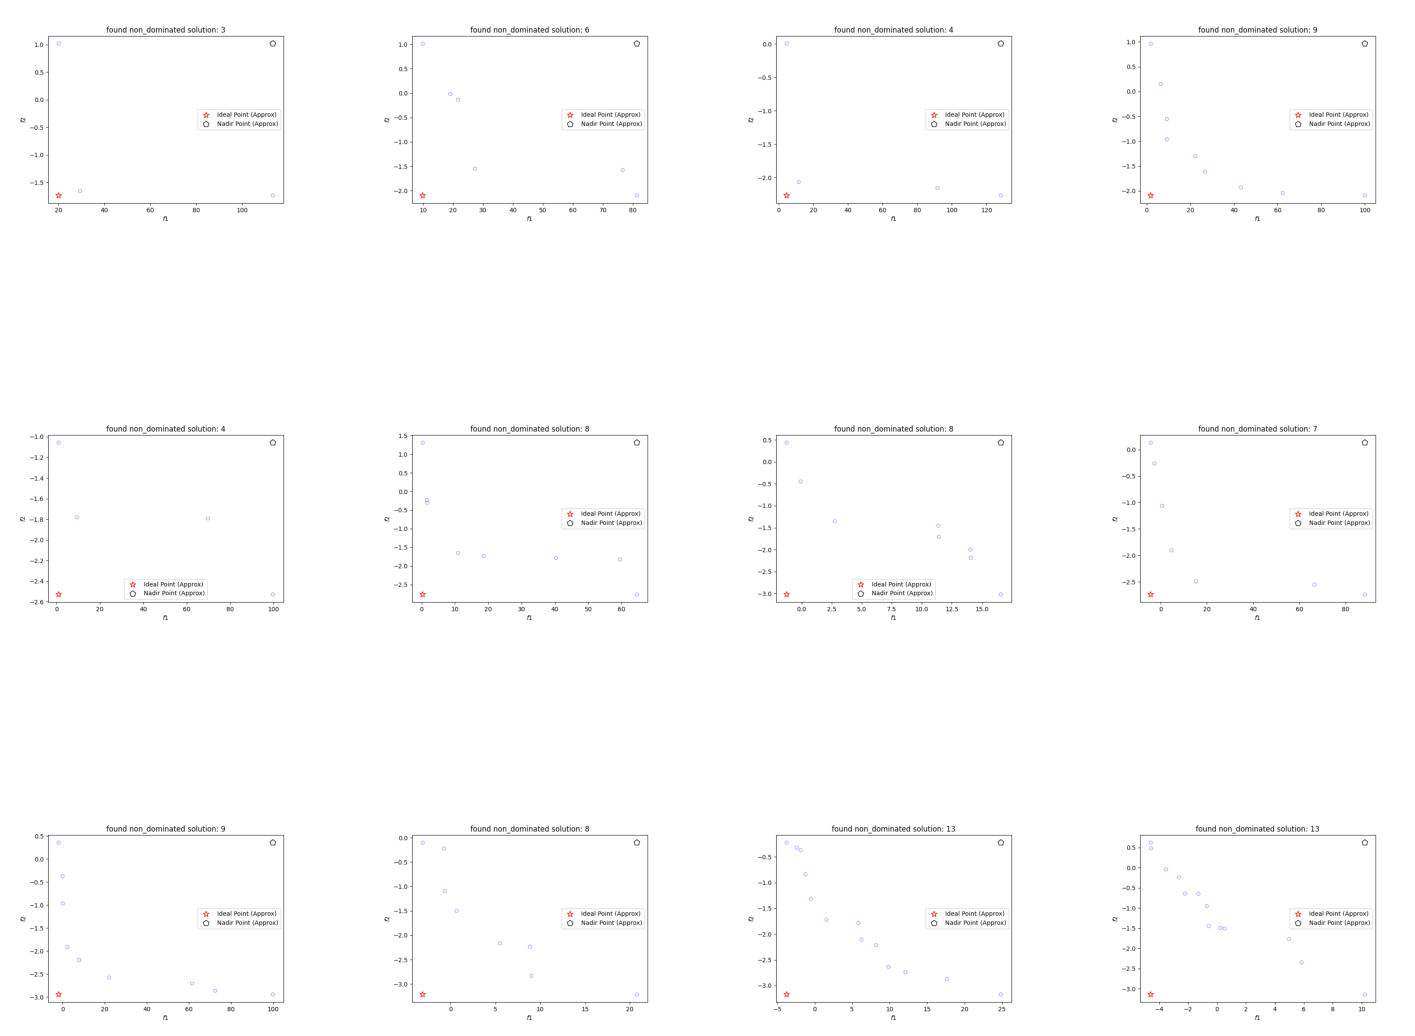

In [10]:
# more figures can be found here: Result/Images/sk2_typo/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(12):
    plt.subplot(3,4,i+1)
    f = sk2_typo['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.axis('off')
    plt.imshow(img)

In [11]:

nadir_arr  = np.array([i for i in np.array(sk2_typo['nadir_point'])])

print(np.round(np.max(nadir_arr, axis=0)))


ref_point = np.array([128, 1 ])
pf = np.loadtxt(os.path.join(cdir, 'Bench/sk2_typo_pf' ))
sk2_typo_table_1 = hv_result(sk2_typo)

sk2_typo_table_1

[128.   1.]
ref_point is [128   1]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,SK2_TYPO,2,4,3,262.7812331,19.1193268,"[113.34616519927131, 1.0165499254966832]",100,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0004597,[128 1]
1,SK2_TYPO,2,4,6,291.5211150,9.9124365,"[81.31886087977772, 1.0146283604093227]",200,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0005438,[128 1]
2,SK2_TYPO,2,4,4,367.0246509,5.4105960,"[128.30370835776637, 0.005702290898757332]",300,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0004549,[128 1]
3,SK2_TYPO,2,4,9,338.5684445,4.2513974,"[100.00022076299855, 0.9634383344974717]",500,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0007532,[128 1]
4,SK2_TYPO,2,4,4,368.5881303,2.9037180,"[99.72436555753094, -1.0573306998498382]",600,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0004408,[128 1]
5,SK2_TYPO,2,4,8,398.5049194,3.2068697,"[64.60924203296007, 1.3105003307793177]",1000,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0006251,[128 1]
6,SK2_TYPO,2,4,8,488.2180127,2.0191840,"[16.58103675800308, 0.4360435900857358]",3000,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0006268,[128 1]
7,SK2_TYPO,2,4,7,449.5807218,0.9336130,"[88.33153835644191, 0.1336683765271925]",6000,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0006342,[128 1]
8,SK2_TYPO,2,4,9,465.6298693,1.5188360,"[99.87959214655646, 0.3564198952105647]",10000,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0007000,[128 1]
9,SK2_TYPO,2,4,8,525.8143954,0.9504348,"[20.7822032926846, -0.10113621823016201]",15000,Result/Random_Search/SK2_TYPO/SK2_TYPO_Obj-2_V...,Result/Images/Random_Search/SK2_TYPO/SK2_TYPO_...,0.0006521,[128 1]


In [13]:
ref_point = np.array([5, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/sk2_typo_pf' ))
sk2_typo_table_2 = hv_result(sk2_typo)


ref_point is [5 5]


In [14]:
pd.concat([sk2_typo_table_1,sk2_typo_table_2]).to_excel('Excel/Excel_Random/sk2_typo.xlsx', engine = 'xlsxwriter')

# SK2

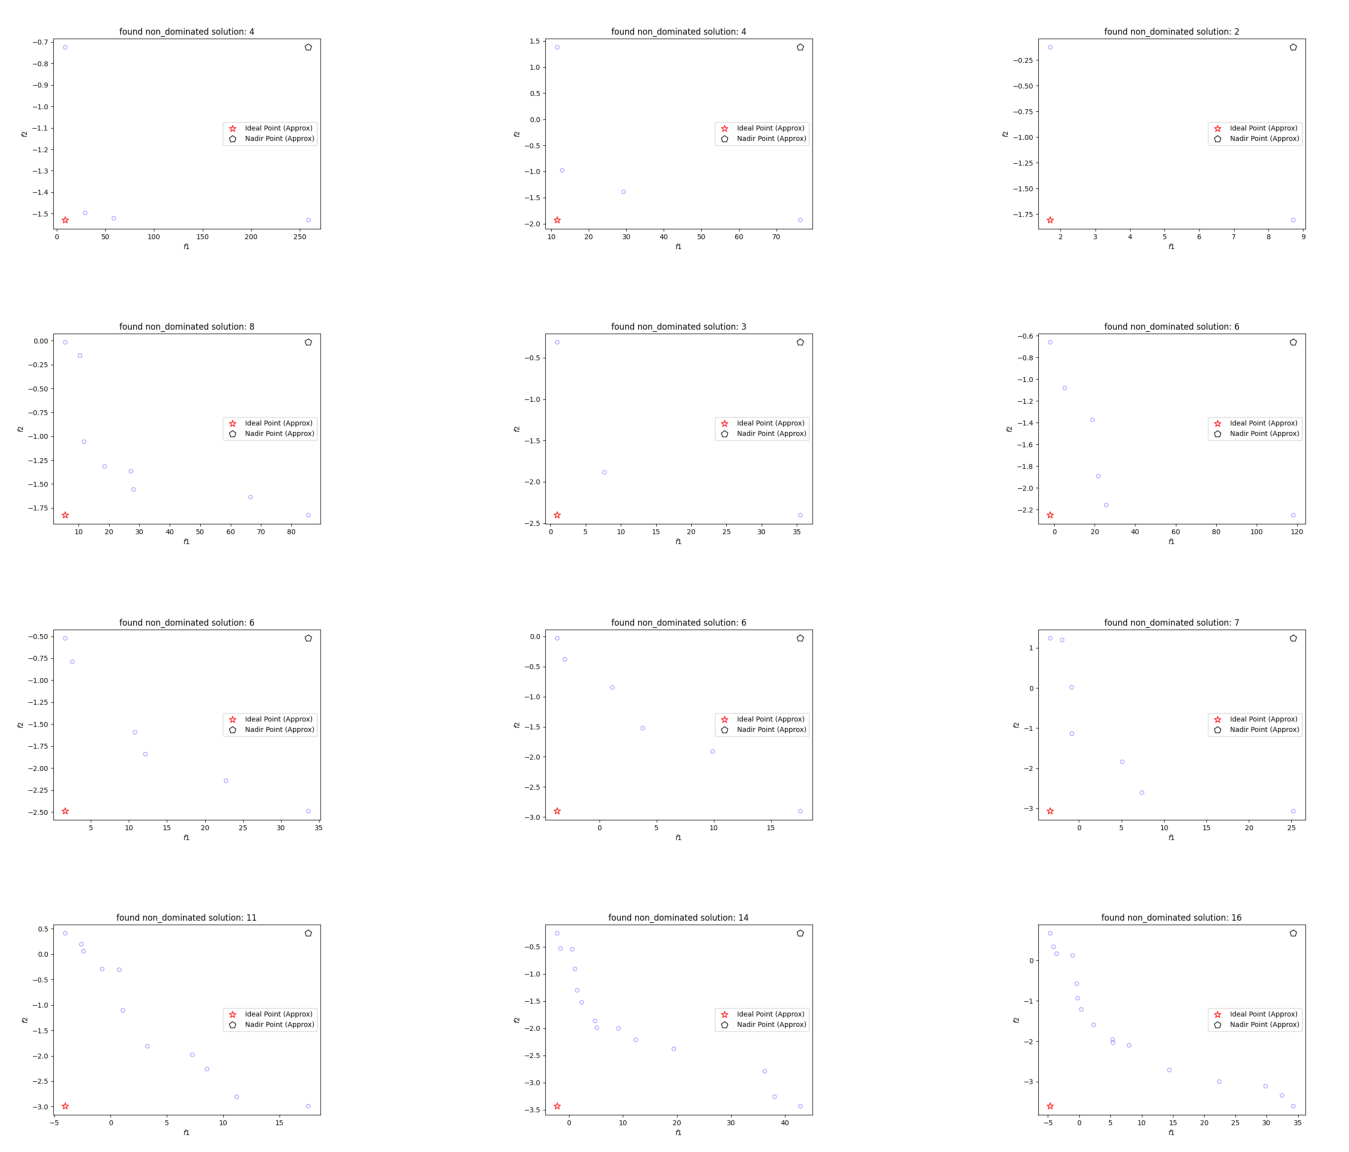

In [15]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(12):
    plt.subplot(4,3,i+1)
    f = sk2['image_location'][i+0]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)

    plt.axis('off')
    plt.imshow(img)

In [18]:
np.array([i for i in np.array(sk2['nadir_point'])])
print(np.round(np.max(nadir_arr, axis=0)))


ref_point = np.array([128,1])
pf = np.loadtxt(os.path.join(cdir, 'Bench/sk2_pf' ))
sk2_table = hv_result(sk2)
sk2_table

[128.   1.]
ref_point is [128   1]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,SK2,2,4,4,283.1548548,7.2276328,"[258.8903761912334, -0.7245490998981529]",100,Result/Random_Search/SK2/SK2_Obj-2_Var-4.c0a4a...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0007629,[128 1]
1,SK2,2,4,4,296.4069511,9.4940779,"[76.39950078465033, 1.3797670786052552]",200,Result/Random_Search/SK2/SK2_Obj-2_Var-4.7d998...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0006101,[128 1]
2,SK2,2,4,2,343.1017748,2.9943408,"[8.717410477187158, -0.12738843213361822]",300,Result/Random_Search/SK2/SK2_Obj-2_Var-4.2677e...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0004461,[128 1]
3,SK2,2,4,8,310.7316115,5.2214565,"[85.52906666213944, -0.01619162343271804]",500,Result/Random_Search/SK2/SK2_Obj-2_Var-4.3f6da...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0008829,[128 1]
4,SK2,2,4,3,403.9509143,2.5763931,"[35.496117532878266, -0.31278584167136647]",600,Result/Random_Search/SK2/SK2_Obj-2_Var-4.3bf27...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0006418,[128 1]
5,SK2,2,4,6,382.6792916,1.5658831,"[118.16405205105983, -0.6595281596896877]",1000,Result/Random_Search/SK2/SK2_Obj-2_Var-4.c5794...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0007460,[128 1]
6,SK2,2,4,6,413.4872967,2.7645293,"[33.60225257847418, -0.5221771059257259]",3000,Result/Random_Search/SK2/SK2_Obj-2_Var-4.07802...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0007203,[128 1]
7,SK2,2,4,6,480.1681906,0.8426577,"[17.572520950062156, -0.028795078870840814]",6000,Result/Random_Search/SK2/SK2_Obj-2_Var-4.63630...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0007241,[128 1]
8,SK2,2,4,7,501.9340369,0.8714563,"[25.224816634359218, 1.237744105733453]",10000,Result/Random_Search/SK2/SK2_Obj-2_Var-4.b7cf5...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0007238,[128 1]
9,SK2,2,4,11,498.3193757,0.6543383,"[17.56665537888822, 0.4112654486214485]",15000,Result/Random_Search/SK2/SK2_Obj-2_Var-4.de9c6...,Result/Images/Random_Search/SK2/SK2_Obj-2_Var-...,0.0009930,[128 1]


In [19]:
ref_point = np.array([5,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/sk2_pf' ))
sk2_table_2 = hv_result(sk2)

ref_point is [5 5]


In [20]:
pd.concat([sk2_table,sk2_table_2]).to_excel('Excel/Excel_Random/sk2.xlsx', engine = 'xlsxwriter')